# Collinearity

In a regression model, collinearity is present when one or more predictors have a linear correlation with each other. This can be problematic, since collinearity may make the model sensitive to small changes. In addition, it adds ambiguity to the effect of features on the target variable.

## Dataset

To demonstate an example of collinearity and how to approach it, the Financial Indicators of US Stocks dataset from Kaggle will be used. This data contains over 200 numerical predictors with significant multicollinearity. 

In [74]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.read_csv(r"2018_Financial_Data.csv")

In [70]:
df.head()

,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class
0,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,3.380000e+09,...,0.1865,0.2348,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,1
1,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,5.870000e+08,...,-0.1421,-0.2785,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,1
2,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,2.264000e+09,...,0.0592,0.0772,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,1
3,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,1.680000e+08,...,0.0000,0.0000,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,1
4,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,5.830000e+08,...,-0.1408,-0.2619,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,1


## Visualizing Collinearity

Since the dataset contains over 200 features, it would be challenging to view individual scatterplots of predictor variables and identify correlations present. Instead, a correlation plot will be used to visualize the correlations present in this dataset. From the correlation plot, it is evident that there is significant multicorrelation present, particularly in the top left quadrent of the plot. 

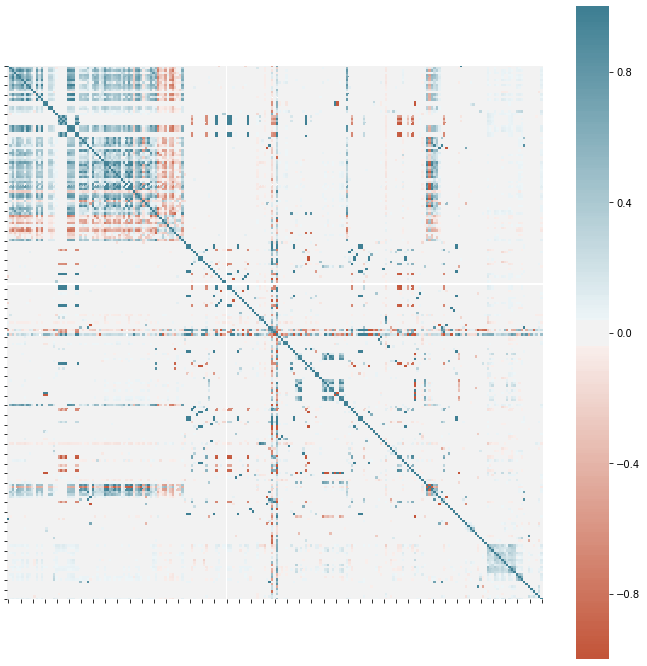

<Figure size 1152x720 with 0 Axes>

In [67]:
from matplotlib import pyplot as plt
import seaborn as sns

#drop target variables and index
cols = [1,223]
df.drop(df.columns[cols],axis=1,inplace=True)

corr = df.corr()
f, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = False
)

ax.set_xticklabels(labels = '', ylabel=None)
ax.set_yticklabels(labels = '', ylabel=None)

plt.figure(figsize=(16, 10))
plt.show()

## Testing for Collinearity

The Variance Inflation Factor (VIF) can be used to detect multicollinearity across variables in regression analysis. This strategy applies regression on each predictor against all other predictors in the model. From each regression model, the R-squared value is calculated and inputed into the following VIF formula.

$$VIF = \frac{1}{1-R_i^2}$$

To interpret the results of this equation, any predictors that score above a VIF of 5 are correlated. Variance Inflation Factors between 1 and 5 indicate moderate correlation, while a VIF below 1 indicates no correlation.

In [72]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
calc_vif(df._get_numeric_data())

MissingDataError: exog contains inf or nans

https://etav.github.io/python/vif_factor_python.html

https://www.statisticshowto.com/variance-inflation-factor/